In [16]:
from collections import deque

def brandes(V, A):
    "Compute betweenness centrality in an unweighted graph."
    # Brandes algorithm
    # see http://www.cs.ucc.ie/~rb4/resources/Brandes.pdf
    C = dict((v,0) for v in V)
    for s in V:
        S = []
        P = dict((w,[]) for w in V)
        g = dict((t, 0) for t in V); g[s] = 1
        d = dict((t,-1) for t in V); d[s] = 0
        Q = deque([])
        Q.append(s)
        while Q:
            v = Q.popleft()
            S.append(v)
            for w in A[v]:
                if d[w] < 0:
                    Q.append(w)
                    d[w] = d[v] + 1
                if d[w] == d[v] + 1:
                    g[w] = g[w] + g[v]
                    P[w].append(v)
        e = dict((v, 0) for v in V)
        while S:
            # print(s)
            w = S.pop()
            for v in P[w]:
                e[v] = e[v] + ((g[v]/g[w]) * (1 + e[w]))
            if w != s:
                # print(w, e[w])
                C[w] = C[w] + e[w]
            
            # print(C)
        # print("___")
    # reduce C/2 to get the centrality
    for v in V:
        C[v] = C[v] / 2
    return C

In [17]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
# G=nx.gnp_random_graph(4,0.3)
G=nx.Graph()
G.add_nodes_from(range(6))
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)

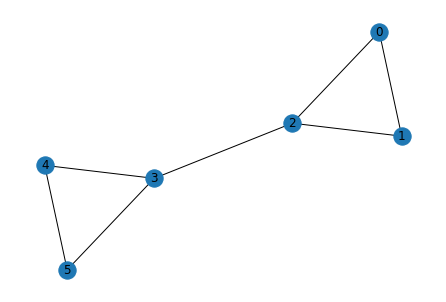

In [18]:
nx.draw(G, with_labels=True)

In [19]:
# List of Nodes
V = list(G.nodes())
# List of Edges
# Edges of the graph
E = list(G.edges())
print("Number of edges:", len(E))
# generate a Dictionary of adjacent vertices
A = dict((v, []) for v in V)
for (u, v) in E:
    A[u].append(v)
    A[v].append(u)

Number of edges: 7


In [20]:
print(V)
print(A)

[0, 1, 2, 3, 4, 5]
{0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [2, 4, 5], 4: [3, 5], 5: [3, 4]}


In [21]:
brandes(V, A)

{0: 0.0, 1: 0.0, 2: 6.0, 3: 6.0, 4: 0.0, 5: 0.0}

In [22]:
# unnormalized betweenness centrality

nx.betweenness_centrality(G,normalized=False)

{(0, 1): 1.0,
 (0, 2): 4.0,
 (1, 2): 4.0,
 (2, 3): 9.0,
 (3, 4): 4.0,
 (3, 5): 4.0,
 (4, 5): 1.0}